In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("datasets/customer-behaviour.csv", delimiter = ";")

data.head()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0


#### Data discovery

In [3]:
# float value columns have comma insteas of decimal point so their data type is object

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account length                       3333 non-null   int64 
 1   location code                        3333 non-null   int64 
 2   user id                              3333 non-null   int64 
 3   credit card info save                3333 non-null   object
 4   push status                          3333 non-null   object
 5   add to wishlist                      3333 non-null   int64 
 6   desktop sessions                     3333 non-null   int64 
 7   app sessions                         3333 non-null   int64 
 8   desktop transactions                 3333 non-null   int64 
 9   total product detail views           3333 non-null   int64 
 10  session duration                     3333 non-null   int64 
 11  promotion clicks                     3333 n

In [7]:
data.isnull().sum().sum()

0

In [8]:
data.duplicated().sum()

0

#### Replace spaces in column names

In [11]:
data.columns = [column.replace(" ", "_") for column in data]

#### Replace comma with decimal point in float value columns and change data type

In [14]:
data["avg_order_value"] = data["avg_order_value"].replace(",",".", regex = True).astype(float)
data["discount_rate_per_visited_products"] = data["discount_rate_per_visited_products"].replace(",",".", regex = True).astype(float)
data["product_detail_view_per_app_session"] = data["product_detail_view_per_app_session"].replace(",",".", regex = True).astype(float)
data["add_to_cart_per_session"] = data["add_to_cart_per_session"].replace(",",".", regex = True).astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account_length                       3333 non-null   int64  
 1   location_code                        3333 non-null   int64  
 2   user_id                              3333 non-null   int64  
 3   credit_card_info_save                3333 non-null   object 
 4   push_status                          3333 non-null   object 
 5   add_to_wishlist                      3333 non-null   int64  
 6   desktop_sessions                     3333 non-null   int64  
 7   app_sessions                         3333 non-null   int64  
 8   desktop_transactions                 3333 non-null   int64  
 9   total_product_detail_views           3333 non-null   int64  
 10  session_duration                     3333 non-null   int64  
 11  promotion_clicks              

#### Date Analyze

In [15]:
data.describe()

,account_length,location_code,user_id,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn
count,3333.000000,3333.000000,3.333000e+03,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,3.746291e+06,8.099010,179.811881,30.567957,17.087609,100.435644,201.039604,100.110711,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,2.746626e+05,13.688365,54.457135,9.269376,4.323795,20.069084,50.714359,19.923911,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,3.271058e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,3.508680e+06,0.000000,144.000000,24.000000,14.000000,87.000000,167.000000,87.000000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,3.748187e+06,0.000000,179.000000,31.000000,17.000000,101.000000,201.000000,100.000000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,3.985970e+06,20.000000,216.000000,37.000000,20.000000,114.000000,235.000000,114.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,4.229964e+06,51.000000,351.000000,60.000000,31.000000,165.000000,364.000000,170.000000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [16]:
data.describe(include="object")

,credit_card_info_save,push_status
count,3333,3333
unique,2,2
top,no,no
freq,3010,2411


In [17]:
data.columns

Index(['account_length', 'location_code', 'user_id', 'credit_card_info_save',
       'push_status', 'add_to_wishlist', 'desktop_sessions', 'app_sessions',
       'desktop_transactions', 'total_product_detail_views',
       'session_duration', 'promotion_clicks', 'avg_order_value',
       'sale_product_views', 'discount_rate_per_visited_products',
       'product_detail_view_per_app_session', 'app_transactions',
       'add_to_cart_per_session', 'customer_service_calls', 'churn'],
      dtype='object')

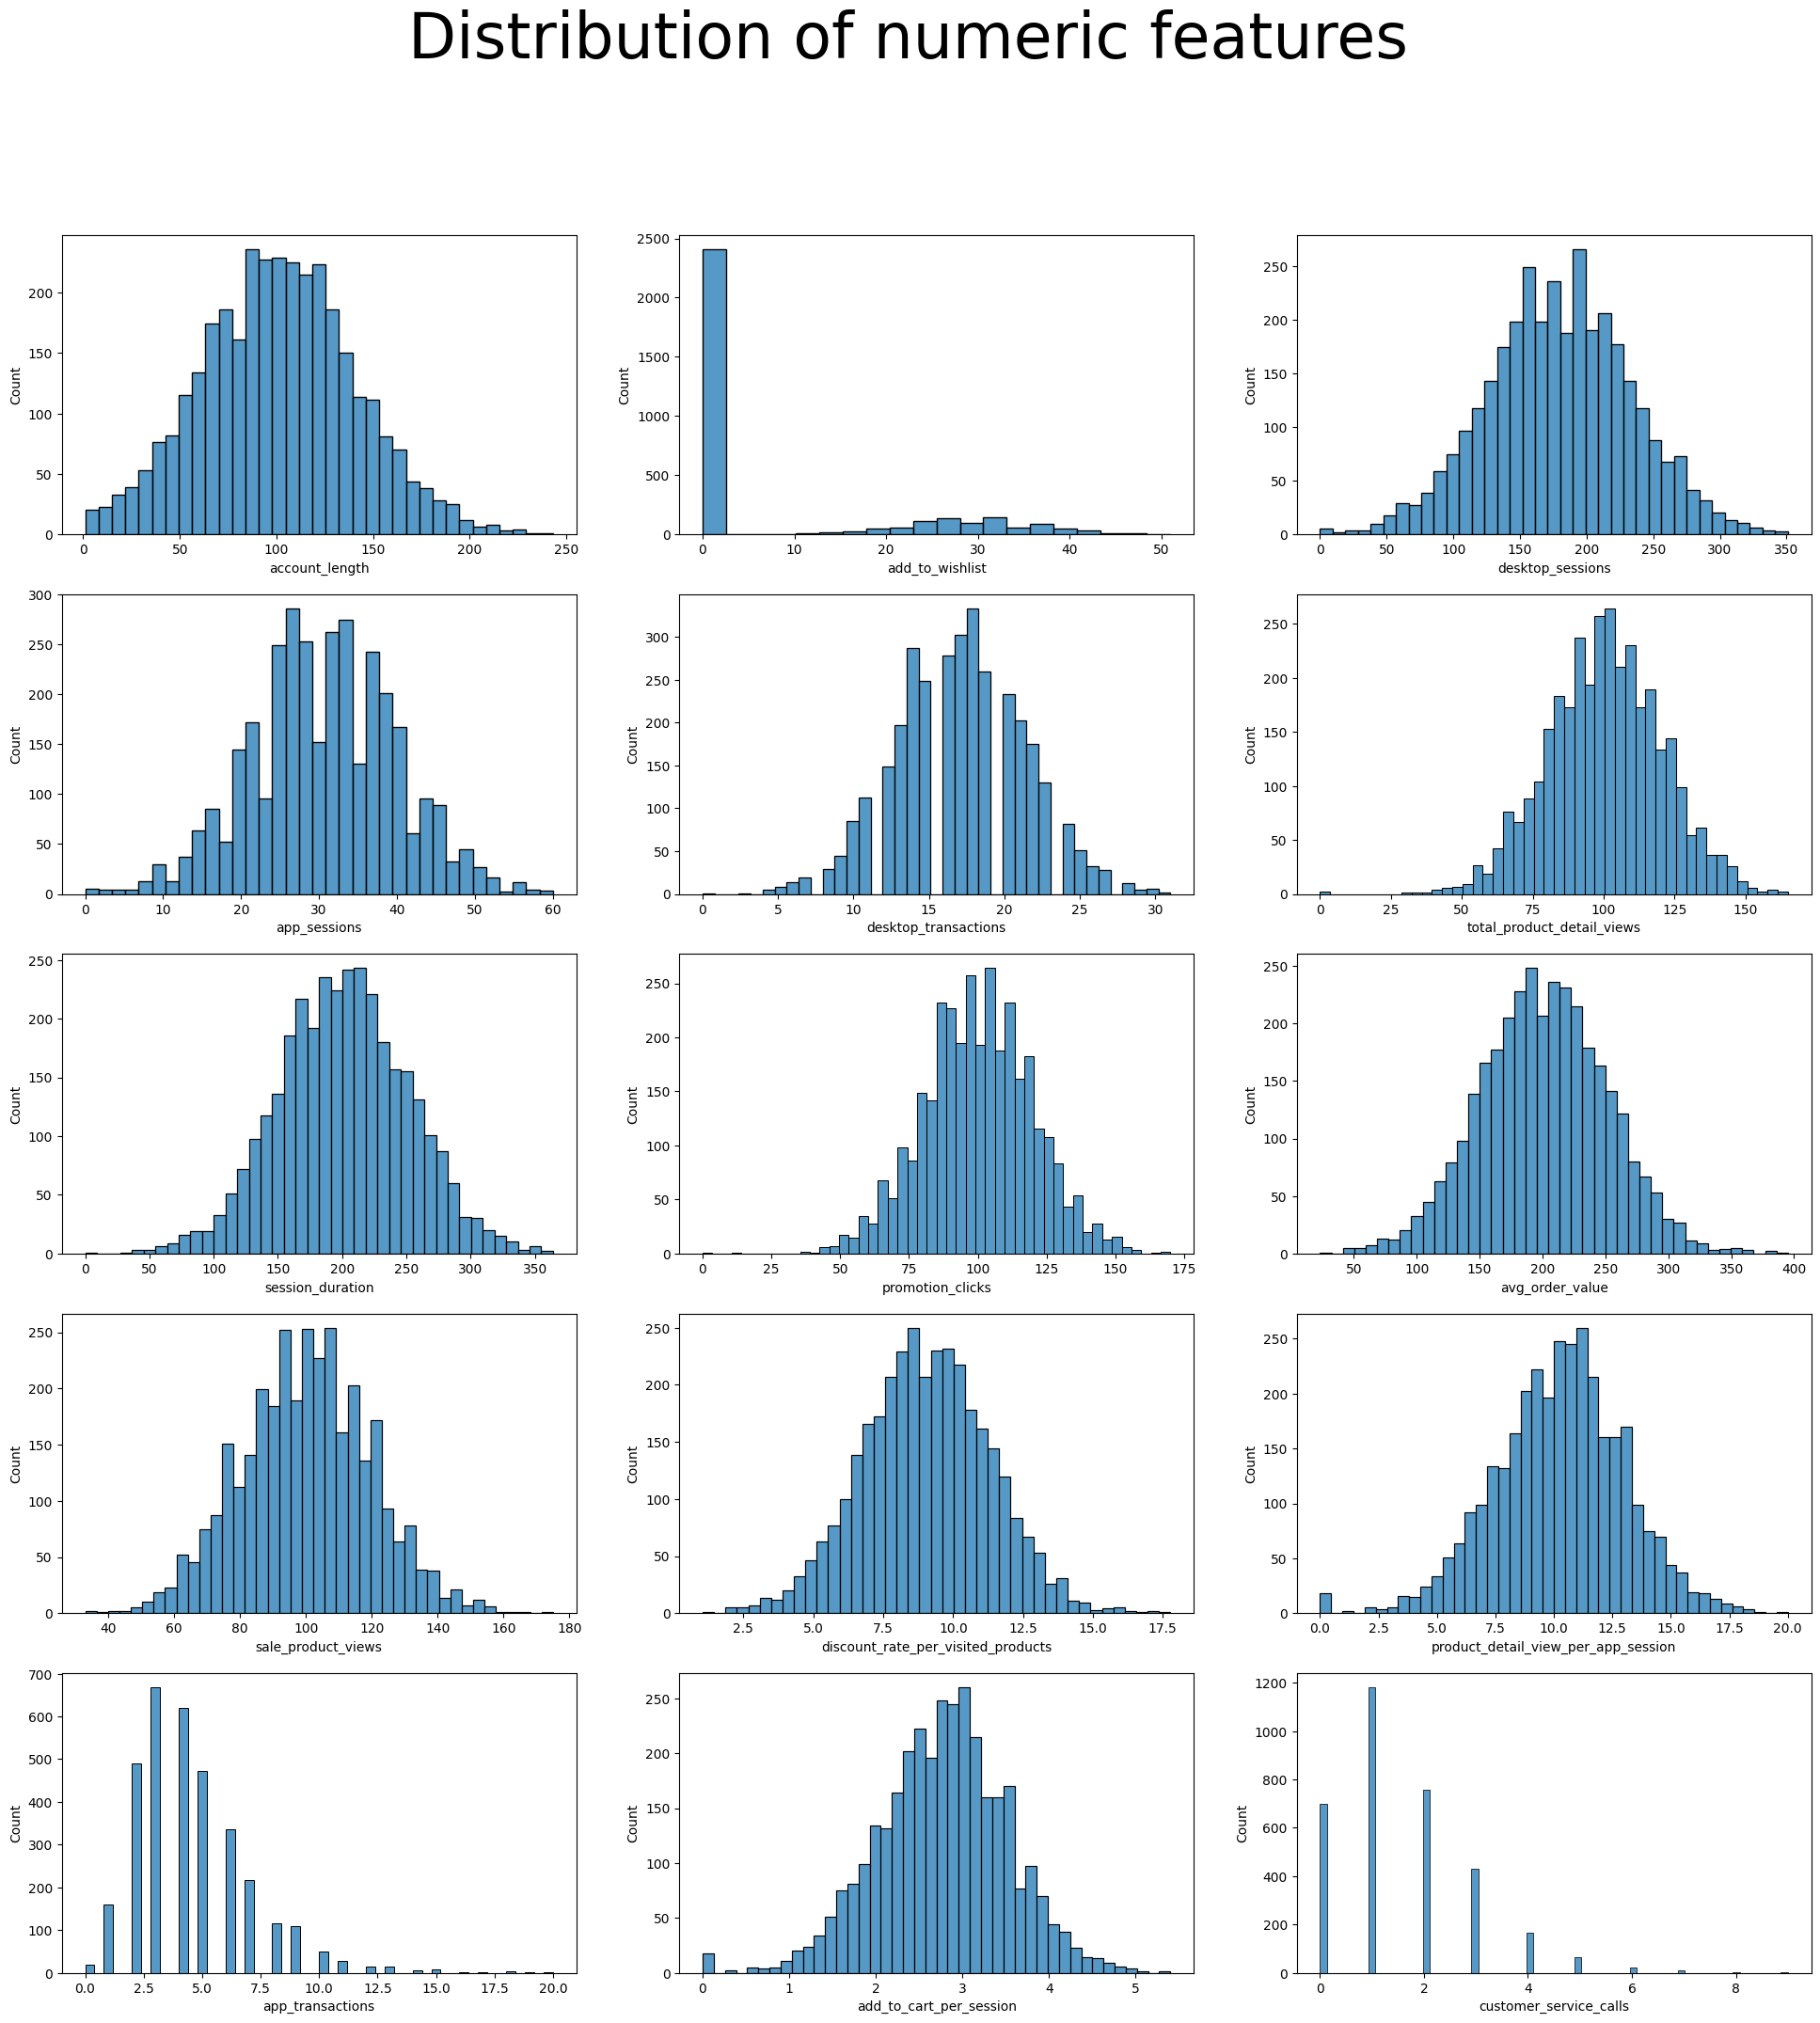

In [18]:
numeric_columns = [
  'account_length', 'add_to_wishlist', 'desktop_sessions',
  'app_sessions', 'desktop_transactions', 'total_product_detail_views',
  'session_duration', 'promotion_clicks', 'avg_order_value',
  'sale_product_views', 'discount_rate_per_visited_products', 'product_detail_view_per_app_session',
  'app_transactions', 'add_to_cart_per_session', 'customer_service_calls'
]

figure, axes = plt.subplots(5, 3, figsize = (24, 24))
figure.suptitle("Distribution of numeric features", size = 48)

for i in range(5):
  for j in range(3):
    sns.histplot(data[numeric_columns[3*i+j]], ax = axes[i, j])

In [22]:
churn_data = data["churn"].value_counts()

churn_data

churn
0    2850
1     483
Name: count, dtype: int64

[Text(0, 0, '2850')]

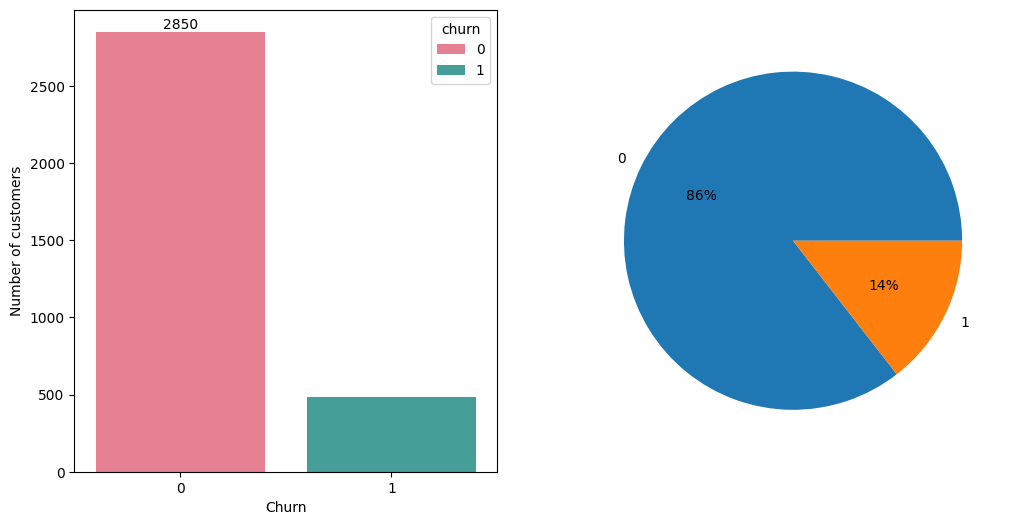

In [31]:
figure, axes = plt.subplots(1, 2, figsize = (12, 6))

plt.pie(churn_data, labels = churn_data.index.tolist(), autopct = "%.0f%%")

count_plot = sns.countplot(data = data, x = "churn", ax = axes[0], hue = "churn",  palette = "husl")

count_plot.set_xlabel("Churn")
count_plot.set_ylabel("Number of customers")
count_plot.bar_label(count_plot.containers[0])

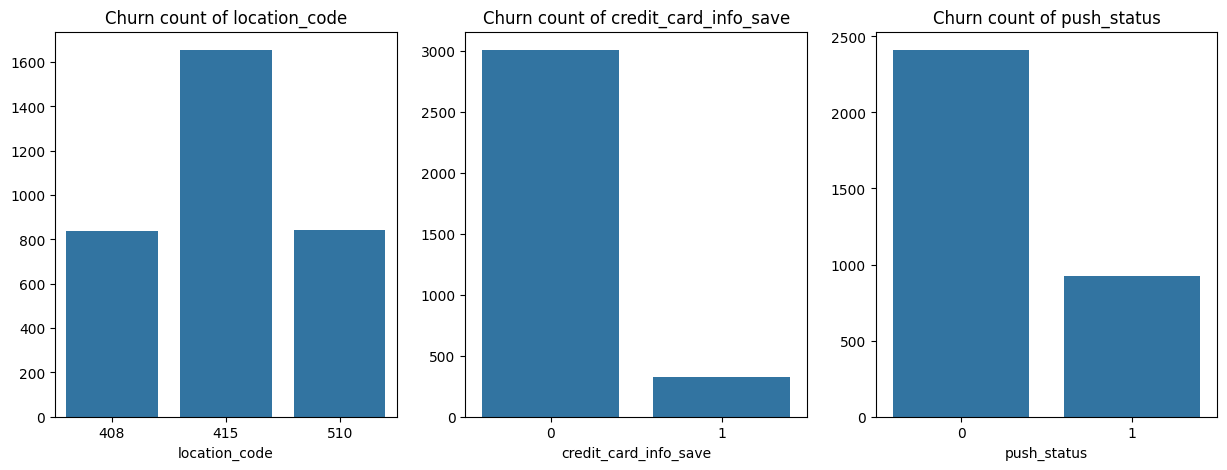

In [35]:
categorical_columns = ["location_code", "credit_card_info_save", "push_status"]

for i in data.select_dtypes(include = ["object"]).columns.values:
  data[i] = data[i].replace(["yes", "no"], [1, 0])

figure, axes = plt.subplots(1, 3, figsize = (15, 5))
for i, ax in zip(categorical_columns, axes):
  temp = data[i].value_counts()
  ax.set_title("Churn count of " + str(i))
  sns.barplot(x = temp.index, y = temp.values, ax = ax)